In [1]:
!wget http://cb.lk/covid_19
!unzip covid_19

--2023-10-11 15:23:37--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 104.21.72.203, 172.67.187.81, 2606:4700:3032::ac43:bb51, ...
Connecting to cb.lk (cb.lk)|104.21.72.203|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2023-10-11 15:23:37--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2023-10-11 15:23:38--  https://www.dropbox.com/s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9df9

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import *
from keras.layers import *
from numpy import argmax
from sklearn.metrics import accuracy_score,  confusion_matrix
from tensorflow.keras.utils import load_img, img_to_array, array_to_img
import numpy as np

In [3]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,)
test_datagen = ImageDataGenerator(rescale=1./255,)

In [4]:
train_set = train_datagen.flow_from_directory(
    '/content/CovidDataset/Train',
    target_size=(224, 224),
    batch_size=32,
    # class_mode='binary', # defualt is multiclssificatoin(categorical)
    shuffle=False
)

Found 224 images belonging to 2 classes.


In [5]:
test_set = train_datagen.flow_from_directory(
    '/content/CovidDataset/Val',
    target_size=(224, 224),
    batch_size=32,
    # class_mode='binary', # defualt is multiclssificatoin(categorical)
    shuffle=False
)

Found 60 images belonging to 2 classes.


In [6]:
len(test_set) # number of batches

2

In [7]:
len(test_set[0]) # each batch contain img and lbl

2

In [8]:
test_set[1][1] # each batch contain img and lbl

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [9]:
# import os
# os.listdir( '/content/CovidDataset/Val')

In [10]:
#************** AlexNet ********************
model = Sequential()
# model.add(Conv2D(96, kernel_size=(11, 11), strides=(4,4), padding="same", activation='relu', input_shape=(224,224,3)))

# model.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2)))

# model.add(Conv2D(256, (5, 5),strides=(1,1),padding="same", activation='relu'))

# model.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2)))

# model.add(Conv2D(384, (3, 3),strides=(1,1), padding="same", activation='relu'))

# model.add(Conv2D(384, (3, 3),strides=(1,1), padding="same", activation='relu'))

# model.add(Conv2D(384, (3, 3),strides=(1,1), padding="same", activation='relu'))

# model.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2),padding="same"))

# model.add(Flatten())

# model.add(Dense(4096, activation='relu'))

# model.add(Dense(4096, activation='relu'))

# model.add(Dense(1, activation='sigmoid'))

# ************* google vgg 16 ***********************
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),name='vgg16'))

model.add(Flatten(name='flatten'))

model.add(Dense(4096, activation='relu', name='fc1'))

model.add(Dense(4096, activation='relu', name='fc2'))

model.add(Dense(2, activation='softmax', name='output'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                   

In [12]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer="sgd", metrics=['accuracy'])
model.fit( train_set,
          epochs=10,
           validation_data=test_set,
           steps_per_epoch=len(train_set),
           validation_steps=len(test_set),
           callbacks=tf.keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True))

Epoch 1/10
7/7 [==============================] - 29s 2s/step - loss: 0.6980 - accuracy: 0.1473 - val_loss: 0.6927 - val_accuracy: 0.6000
Epoch 2/10
7/7 [==============================] - 8s 1s/step - loss: 0.6969 - accuracy: 0.4241 - val_loss: 0.6925 - val_accuracy: 0.7000
Epoch 3/10
7/7 [==============================] - 7s 957ms/step - loss: 0.6968 - accuracy: 0.4732 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 4/10
7/7 [==============================] - 7s 1s/step - loss: 0.6964 - accuracy: 0.2143 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 5/10
7/7 [==============================] - 8s 1s/step - loss: 0.6962 - accuracy: 0.3705 - val_loss: 0.6921 - val_accuracy: 0.5000
Epoch 6/10
7/7 [==============================] - 7s 922ms/step - loss: 0.6960 - accuracy: 0.4018 - val_loss: 0.6920 - val_accuracy: 0.8833
Epoch 7/10
7/7 [==============================] - 7s 951ms/step - loss: 0.6962 - accuracy: 0.5536 - val_loss: 0.6918 - val_accuracy: 0.9500
Epoch 8/10
7/7 [===============

In [22]:
score = model.evaluate(test_set)

2/2 [==============================] - 2s 433ms/step - loss: 0.6913 - accuracy: 0.8833


In [14]:
# prediction of our data
y_pred=model.predict(train_set)
y_pred.shape

7/7 [==============================] - 5s 640ms/step


(224, 2)

In [15]:
y_pred1=argmax(y_pred,axis=1)
y_pred1.shape

(224,)

In [23]:
model.save('myModel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
# print(confusion_matrix(test_set.labels,y_pred))
# accuracy_score(test_set,y_pred1)*100

In [17]:
# plt.plot(results.history['accuracy'], label='accuracy')
# plt.plot(results.history['val_accuracy'], label = 'val_accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# #plt.ylim([0.5, 1])
# plt.legend(loc='lower right')

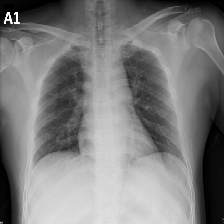

In [18]:
img =load_img('/content/CovidDataset/Train/Covid/1-s2.0-S1684118220300682-main.pdf-002-a1.png',target_size =(224,224))
img

In [19]:
img1 =img_to_array(img)
img1.shape

(224, 224, 3)

In [20]:
img1 = img1/255
img1 =np.expand_dims(test_set[0][0][0], axis =0)
img1.shape

(1, 224, 224, 3)

In [21]:
np.argmax(model.predict(img1),axis=1)

1/1 [==============================] - 1s 639ms/step


array([0])